# HSE 2022: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [338]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points) 

**Task 1** (0.5 points)<br/> 
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [339]:
def find_product(a,r,N):
    progression = np.empty(N)
    progression[:] = r
    progression[0] = a
    return np.cumprod(progression) 

a = 2
r = 3
N = 3
print(find_product(a,r,N))

[ 2.  6. 18.]


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back. 

In [340]:
def check_palindrome(N):
    string_number = str(N)
    return string_number == string_number[::-1]

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/> 
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [341]:
def find_palindromes(N):
    counter = 0
    palindromes = np.empty(N, dtype=int)
    iterative_value = 1000
    while(counter < N):
      if check_palindrome(iterative_value):
        palindromes[counter] = iterative_value
        counter += 1
      iterative_value += 1
    return palindromes

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001 1111 1221 1331 1441]
[1001 1111 1221 1331 1441 1551 1661 1771 1881 1991]
[1001 1111 1221 1331 1441 1551 1661 1771 1881 1991 2002 2112 2222 2332
 2442 2552 2662 2772 2882 2992]


**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [342]:
from random import randint
def find_min(a, b, c):
    min_ = 0
    if a <= b and a <= c:
      min_ = a
    elif b <= a and b <= c:
      min_ = b
    elif c <= a and c <= b:
      min_ = c
    return min_

for i in range(10):
    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    
    print(a, b, c, '\tMinimum:', find_min(a, b, c))

55 17 -88 	Minimum: -88
91 44 88 	Minimum: 44
-25 93 17 	Minimum: -25
-78 79 -14 	Minimum: -78
-100 -98 67 	Minimum: -100
73 -20 24 	Minimum: -20
42 -23 -14 	Minimum: -23
-67 -84 -40 	Minimum: -84
-87 22 -40 	Minimum: -87
-99 -66 -89 	Minimum: -99


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [343]:
my_array = np.random.rand(17)
my_array[16] = 6 - np.sum(my_array[:16])

print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 6.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [344]:
distance = 0

def calculate_manhattan(a, b):    
    return np.sum(np.abs(a-b))

def calculate_euclidean(a, b):    
    return np.sqrt(np.sum(np.power(a-b, 2)))

def calculate_chebyshev(a, b):    
    return np.max(np.abs(a-b))

def calculate_cosine(a, b):    
    return 1 - (np.dot(np.transpose(a), b)/(np.sqrt(np.sum(np.power(a, 2)))*np.sqrt(np.sum(np.power(b, 2)))))

In [345]:
length = randint(1, 5)
a = np.random.rand(length)
b = np.random.rand(length)
print(a, b)

print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

[0.63752332 0.70403936 0.89817906 0.95134221] [0.29851799 0.27654885 0.93431568 0.62926448]
Manhattan distance: 1.124710188233108
Euclidean distance: 0.6345964607129716
Chebyshev distance: 0.42749050808532885
Cosine distance: 0.05864433257604218


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that 
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [346]:
def transform(array):
    transformed_array = ((array-np.min(array))/(np.max(array)-np.min(array)))*3 - 4
    return transformed_array

In [347]:
my_array = np.random.randint(-300, 300, size=76)

my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4.0
Max: -1.0
Array:
[-2.25557461 -1.78730703 -1.28301887 -2.82675815 -2.52315609 -3.70668954
 -3.22813036 -1.62778731 -1.35506003 -2.64665523 -1.55574614 -4.
 -2.38936535 -1.45797599 -1.56603774 -2.43567753 -1.16466552 -1.77701544
 -1.6483705  -1.47855918 -3.92281304 -1.         -3.48027444 -1.37564322
 -1.02572899 -3.67066895 -2.32246998 -3.16638079 -2.45626072 -1.73070326
 -2.57461407 -3.85077187 -2.77015437 -2.90394511 -3.71183533 -2.12692967
 -4.         -2.26072041 -2.82675815 -2.24528302 -3.06861063 -1.23156089
 -3.23842196 -3.01200686 -2.38936535 -3.94854202 -1.95197256 -3.32590051
 -3.97427101 -2.02401372 -2.45111492 -3.75814751 -3.86620926 -3.41852487
 -3.90222985 -3.09948542 -1.06174957 -2.23499142 -3.27958834 -2.9245283
 -2.60548885 -1.27787307 -3.43396226 -3.81475129 -1.81818182 -3.87135506
 -1.30874786 -3.21269297 -2.43053173 -3.64493997 -2.43567753 -3.65523156
 -2.57975986 -1.82847341 -3.74785592 -3.55746141]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [348]:
my_array = np.random.randint(-7, 43, size=(8, 5))
selected_column = np.argmax(my_array) % my_array.shape[1]

print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
# From 0 to 4.
print(f'Selected column: {selected_column}')

Shape:  (8, 5)
Array:
[[11  3 35 27 27]
 [16 31  4 29 16]
 [36  1 41 32 -6]
 [28 15 34 -2 35]
 [35 28  4 28 41]
 [26 -5  6 42 39]
 [-2 13 31  6 11]
 [ 7 38 11 32 -4]]
Selected column: 3


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [349]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[       nan 0.54377787        nan        nan 0.1345903  0.17512339
        nan 0.46098803 0.32742846 0.96789314]


In [350]:
def replace_missing(arr):
    med = np.median(arr[~np.isnan(arr)])
    arr[np.isnan(arr)] = med
    return arr

In [351]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.39420825 0.54377787 0.39420825 0.39420825 0.1345903  0.17512339
 0.39420825 0.46098803 0.32742846 0.96789314]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [352]:
def mean_channel(X):
    new_x = np.mean(X, axis=(0, 1))
    return new_x

In [353]:
n = 19
m = 23
X =  np.random.randint(-11, 8, size=(n, m, 3))
print(f"Vector of means: {mean_channel(X)}")

Vector of means: [-2.15789474 -2.34782609 -2.00686499]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [354]:
def get_unique_columns(X):
    return np.unique(X, axis=1)

In [355]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique rows:')
get_unique_columns(X)

Matrix:
[[[5 5 5]
  [4 4 5]
  [4 4 5]]

 [[5 4 4]
  [5 5 4]
  [5 4 5]]

 [[4 4 4]
  [4 5 5]
  [4 4 5]]

 [[4 5 4]
  [5 4 5]
  [5 5 5]]

 [[5 5 4]
  [4 5 5]
  [5 4 4]]

 [[4 5 4]
  [5 4 4]
  [4 4 4]]

 [[4 4 5]
  [5 4 4]
  [5 5 4]]

 [[5 5 5]
  [4 5 4]
  [5 5 5]]

 [[4 4 4]
  [4 4 4]
  [5 4 5]]

 [[5 4 5]
  [4 5 5]
  [4 4 4]]

 [[5 4 4]
  [5 5 5]
  [5 4 5]]

 [[5 4 4]
  [5 5 4]
  [5 5 5]]

 [[4 5 4]
  [5 4 4]
  [4 5 5]]

 [[5 5 5]
  [4 4 4]
  [4 5 5]]

 [[5 4 4]
  [5 4 5]
  [4 5 5]]

 [[5 4 4]
  [5 4 5]
  [4 5 4]]

 [[4 4 5]
  [5 4 5]
  [5 4 4]]

 [[5 4 5]
  [5 4 5]
  [4 5 4]]

 [[5 5 5]
  [4 4 5]
  [4 4 4]]]
Unique rows:


array([[[4, 4, 5],
        [4, 4, 5],
        [5, 5, 5]],

       [[5, 4, 5],
        [5, 5, 4],
        [5, 4, 4]],

       [[4, 4, 5],
        [4, 5, 5],
        [4, 4, 4]],

       [[5, 5, 5],
        [5, 4, 5],
        [4, 5, 4]],

       [[5, 4, 4],
        [4, 5, 5],
        [5, 5, 4]],

       [[4, 4, 4],
        [5, 4, 4],
        [4, 5, 4]],

       [[5, 5, 4],
        [5, 4, 4],
        [4, 4, 5]],

       [[5, 5, 5],
        [4, 5, 4],
        [5, 5, 5]],

       [[5, 4, 5],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 5, 5],
        [5, 4, 5]],

       [[5, 4, 5],
        [5, 5, 5],
        [5, 4, 4]],

       [[5, 5, 5],
        [5, 5, 4],
        [5, 4, 4]],

       [[4, 5, 5],
        [5, 4, 4],
        [4, 5, 4]],

       [[4, 5, 5],
        [4, 4, 4],
        [5, 5, 5]],

       [[4, 5, 5],
        [5, 4, 5],
        [5, 4, 4]],

       [[4, 5, 4],
        [5, 4, 5],
        [5, 4, 4]],

       [[5, 4, 4],
        [5, 4, 5],
        [4, 4, 5]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [356]:
dataset = pd.read_csv("titanic.csv")
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

1) Are there any missing values? In what columns?
- Да, пропущенные значения есть. Они содержатся в столбцах Age, Cabin, Embarked.

In [357]:
#1
print(f"Count of rows in dataset: {dataset.shape[0]}\n")
counts = dataset.count()

print("So, counts of missing values by columns are:")
print(dataset.isnull().sum())

Count of rows in dataset: 891

So, counts of missing values by columns are:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


2) What is the percentage of survived passengers? Are the classes balanced?
- Число выживших по всем классам от общего числа пассажиров:38.384%
- Число выживших по классам: I: 62.963%; II: 47.283%; III: 24.236%

- Таким образом, очевидно, что баланса в данных соотношениях нет, отношение выживших к общему числу в классе для 1 класса примерно в 1,5 раза выше, чем аналогичное во 2-м, и почти в 3 раза выше по сравнению с 3-м.

In [358]:
print("Percentage of survived passengers: {:.3f}%".format(dataset['Survived'].sum()/dataset.shape[0]*100))
sub_first = dataset.loc[dataset["Pclass"] == 1, "Survived"]
sub_second = dataset.loc[dataset["Pclass"] == 2, "Survived"]
sub_third = dataset.loc[dataset["Pclass"] == 3, "Survived"]
print("Percentage for 1-st class: {:.3f}%".format(sub_first.sum()/sub_first.shape[0]*100))
print("Percentage for 2-nd class: {:.3f}%".format(sub_second.sum()/sub_second.shape[0]*100))
print("Percentage for 3-rd class: {:.3f}%".format(sub_third.sum()/sub_third.shape[0]*100))

Percentage of survived passengers: 38.384%
Percentage for 1-st class: 62.963%
Percentage for 2-nd class: 47.283%
Percentage for 3-rd class: 24.236%


3) Were there more males or females?
- Males.

In [359]:
genders_count = dataset.Sex.value_counts()
print(genders_count)
print("\nThere was more {0} persons.".format("male" if genders_count.loc["male"] > genders_count.loc["female"] else "female"))

male      577
female    314
Name: Sex, dtype: int64

There was more male persons.


4) What what the least popular port of embarkation?
- Q.


In [360]:
print(dataset.Embarked.value_counts().index[-1])

Q


5) How many classes (pclass) were there on Tinanic?
- 3.

In [361]:
print(dataset.Pclass.value_counts().shape[0])

3


6) What is the overall average ticket fare? And for every class?
- Average ticket fare: 32.204
- I: 84.154687; II: 20.662183; III: 13.675550

In [362]:
print("Average fare: {:.3f}\n".format(dataset.Fare.mean()))
dataset.groupby(['Pclass']).mean()["Fare"]

Average fare: 32.204



Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

Mean age: 29.69911764705882
Male mean age: 30.72664459161148, female mean age: 27.915708812260537


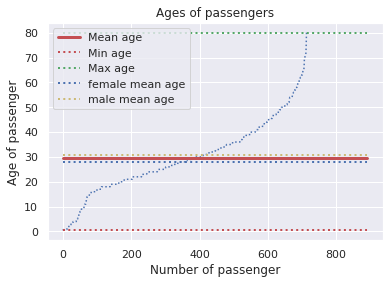

In [363]:
ages = dataset.sort_values("Age")["Age"]
plt.plot(range(ages.shape[0]), ages,  linestyle=':')
print(f'Mean age: {dataset["Age"].mean()}')
plt.plot([0, ages.shape[0]], [dataset["Age"].mean(), dataset["Age"].mean()],  '-r', linewidth=3, label='Mean age')
plt.plot([0, ages.shape[0]], [ages.min(), ages.min()], '-r', linewidth=2, linestyle=':', label='Min age')
plt.plot([0, ages.shape[0]], [ages.max(), ages.max()], '-g', linewidth=2, linestyle=':', label='Max age')
group_ages = dataset.groupby(['Sex']).mean()['Age']
female_mean_age, male_mean_age = group_ages['female'], group_ages['male']
print(f"Male mean age: {male_mean_age}, female mean age: {female_mean_age}")
plt.plot([0, ages.shape[0]], [female_mean_age, female_mean_age], '-b', linewidth=2, linestyle=':', label='female mean age')
plt.plot([0, ages.shape[0]], [male_mean_age, male_mean_age], '-y', linewidth=2, linestyle=':', label='male mean age')
plt.xlabel("Number of passenger")
plt.ylabel("Age of passenger")
plt.title("Ages of passengers")
plt.legend()
plt.show()

Средний возраст на корабле - 29.7 лет Средний возраст мужчин - 30.73 Средний возраст женщин - 27.92 По графику можно увидеть, что возраст пассажиров довольно равномерно распределен для пассажиров 20-50 лет Но пассажиров младше 20ти и старше 50ти значительно меньше, чем остальных. Так же интересно наблюдение, что женщины м среднем моложе, что вероятно связано с тем, что в то время в браке было принято, что женщина моложе мужчины.


**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

- There was 17 unique titles.
- The answer is below.
- For male: "Mr", for female: "Miss"

In [364]:
def get_titles(source):
  return source.str.split('.').str[0].str.split(' ').str[-1].value_counts()

all_titles = get_titles(dataset.Name)
print("Count of unique titles: ", all_titles.index.shape[0], "\n")
print("Count of passengers with every title:\n", all_titles, "\n")

genders = dataset.groupby(['Sex'])
print("The most popular male title: ", get_titles(genders.get_group('male')['Name']).index[0])
print("The most popular female title: ", get_titles(genders.get_group('female')['Name']).index[0])

Count of unique titles:  17 

Count of passengers with every title:
 Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64 

The most popular male title:  Mr
The most popular female title:  Miss


**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



Correlation between class and fare:  -0.5494996199439074
First class mean fare (ticket price): 84.1546875
Second class mean fare (ticket price): 20.662183152173913
Third class mean fare (ticket price): 13.675550101832993


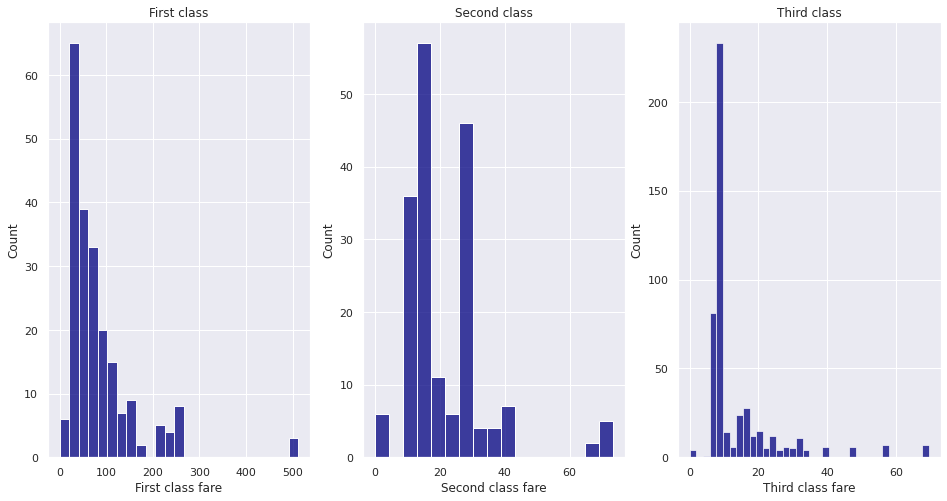

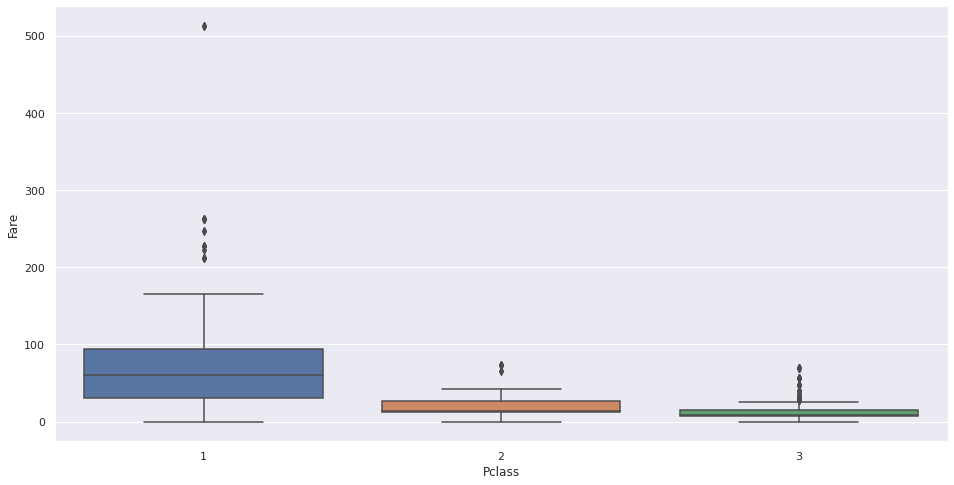

In [365]:
print("Correlation between class and fare: ", dataset["Pclass"].corr(dataset["Fare"]))
sub_first_fare = dataset.loc[dataset["Pclass"] == 1, "Fare"]
sub_second_fare = dataset.loc[dataset["Pclass"] == 2, "Fare"]
sub_third_fare = dataset.loc[dataset["Pclass"] == 3, "Fare"]
print(f"First class mean fare (ticket price): {sub_first_fare.mean()}")
print(f"Second class mean fare (ticket price): {sub_second_fare.mean()}")
print(f"Third class mean fare (ticket price): {sub_third_fare.mean()}")

sns.set(rc={"figure.figsize":(16, 8)})

fig, axes = plt.subplots(1, 3)
f_plot = sns.histplot(data = sub_first_fare, color = 'navy', ax=axes[0])
f_plot.set(xlabel ="First class fare", ylabel = "Count", title ='First class')
s_plot = sns.histplot(data = sub_second_fare, color = 'navy', ax=axes[1])
s_plot.set(xlabel ="Second class fare", ylabel = "Count", title ='Second class')
t_plot = sns.histplot(data = sub_third_fare, color = 'navy', ax=axes[2])
t_plot.set(xlabel ="Third class fare", ylabel = "Count", title ='Third class')
plt.show()

sns.boxplot(data=dataset, x="Pclass", y="Fare")

**Conclusion:** Между величинами цены билета и классом значение корреляции округлённо равняется -0,55, что говорит о средней (по шкале Чеддока) обратной зависимости между этими величинами. Иными словами, чем выше стоимость билета, тем меньше (престижнее) номер класса, и наоборот, чем ниже стоимость билета, тем больше(хуже) номер класса.
- Округлённые средние значения стоимости для билетов разных классов следующие: I: 84.155; II: 20.662; III: 13.676. По этим данным нетрудно заметить, что с ухудшением класса падает цена, что и было предположено по корреляции между данными величинами. Однако средние значения указывает только на центр распределения по классам и ничего не сообщает о наличии выбросов.
- Был построен boxplot для всех трёх классов. Выбросы наблюдаются у всех классов. Распределения имеет положительную асимметрию, поскольку ус и полубокс длиннее сверху от медианы, чем снизу.
- Гистограмма цен на билеты для первого класса наводит на мысли, что цена для первого класса может иметь логнормальное распределение.


**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [366]:
data_copy = dataset.copy().loc[:, ["Embarked", "Fare"]]

Correlation between embarked and fare columns:  0.06346234476922943
First port mean fare (ticket price): 27.079811801242233
Second port mean fare (ticket price): 59.95414404761905
Third port mean fare (ticket price): 13.276029870129872
Correlation between corrected embarked and fare columns:  0.2695875522775061


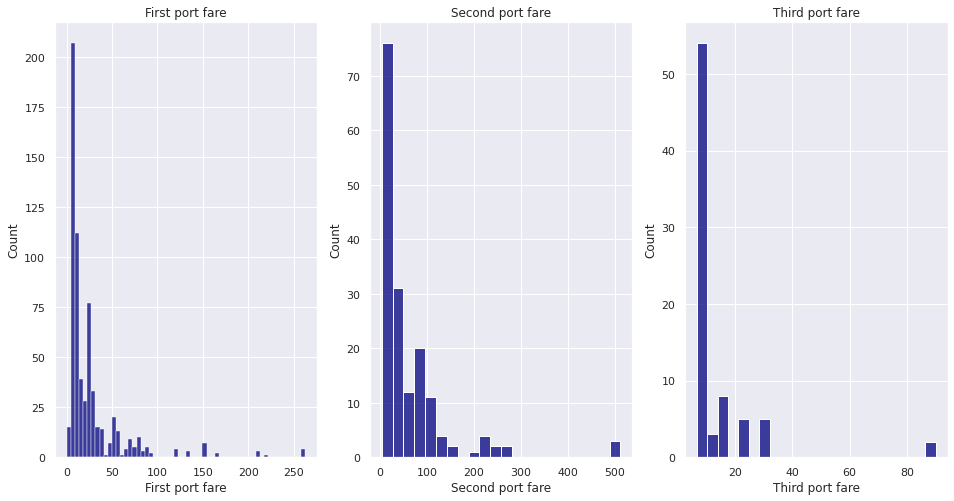

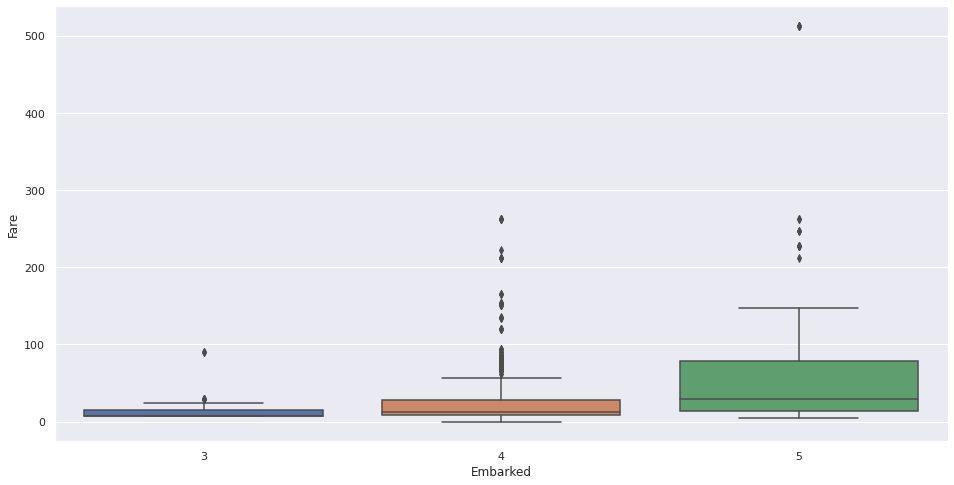

In [367]:
# embarked - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

# Delete rows with nan in embarked column
data_copy.dropna(subset=["Embarked"], inplace=True)

# Translate categorial variable to integer enum
data_copy["Embarked"] = pd.factorize(data_copy["Embarked"])[0]

# These ports may have the same significance,
# by translating this categorical feature into an integer enumeration,
# we could change their significance,
# so the correlation may not give exactly correct results.
print("Correlation between embarked and fare columns: ", data_copy["Embarked"].corr(data_copy["Fare"]))

sub_first_port = data_copy.loc[data_copy["Embarked"] == 0, "Fare"]
sub_second_port = data_copy.loc[data_copy["Embarked"] == 1, "Fare"]
sub_third_port = data_copy.loc[data_copy["Embarked"] == 2, "Fare"]

print(f"First port mean fare (ticket price): {sub_first_port.mean()}")
print(f"Second port mean fare (ticket price): {sub_second_port.mean()}")
print(f"Third port mean fare (ticket price): {sub_third_port.mean()}")

#I: 27.08; II: 59.954; III: 13.276. Let's try to swap indexes.
data_copy['Embarked'] = data_copy['Embarked'].replace([0],4)
data_copy['Embarked'] = data_copy['Embarked'].replace([1],5)
data_copy['Embarked'] = data_copy['Embarked'].replace([2],3)

print("Correlation between corrected embarked and fare columns: ", data_copy["Embarked"].corr(data_copy["Fare"]))


sns.set(rc={"figure.figsize":(16, 8)})
fig, axes = plt.subplots(1, 3)
f_plot = sns.histplot(data = sub_first_port, color = 'navy', ax=axes[0])
f_plot.set(xlabel ="First port fare", ylabel = "Count", title ='First port fare')
s_plot = sns.histplot(data = sub_second_port, color = 'navy', ax=axes[1])
s_plot.set(xlabel ="Second port fare", ylabel = "Count", title ='Second port fare')
t_plot = sns.histplot(data = sub_third_port, color = 'navy', ax=axes[2])
t_plot.set(xlabel ="Third port fare", ylabel = "Count", title ='Third port fare')
plt.show()

sns.boxplot(data=data_copy, x="Embarked", y="Fare")

**Conclusion:** Порт - категориальный признак, для возможности использования мат. функций было необходимо привести его к целочисленному перечислению и что-то сделать с 2 пустыми ячейками. Было принято решение удалить пустые ячейки , поскольку относительно общего числа строк в датасете (891) эти две не так важны. Поначалу названия портов были переведены в последовательность [0, 1, 2], между данными числами есть порядок, однако между портами мог быть другой порядок. Интуитивно хочется расположить индексы в порядке их удалённости, такими данными мы не располагаем, есть смысл попробовать изменить порядок перечисления по возрастанию средней стоимости (по идее, чем дальше плыть, тем дороже поездка). После корректировки индексы стали: [0, 1, 2] -> [4, 5, 3]

- Итак, дав случайные индексы мы получили корреляцию 0,063, что явно не позволяет говорить о зависимости между этими величинами. Рассчитаем средние стоимости билетов по портам: I: 27.08; II: 59.954; III: 13.276. Можно предположить, что по возрастанию стоимости порты можно расположить так: III, I, II. И действительно, корреляция стала равняться примерно 0.269, а по шкале Чеддока это уже слабая прямая зависимость.
- Построенные гистограммы распределения стоимостей билетов по портам объясняют, почему зависимость слабая: например, от 0 до 40 у.е. были билеты во все 3 порта, тем не менее сегмент цен 100+ за вторым (5) портом, минимальных цен за третьим (3), а первый (4) аккурат между ними.
- Был построен boxplot для всех трёх классов. Выбросы наблюдаются у всех классов, однако у последнего порта (3) их всего 2, у среднего(5) - 4, а у первого (4) порта их значительно больше. Медиана смещена у всех, распределения имеет положительную асимметрию, поскольку ус и полубокс длиннее сверху от медианы, чем снизу.


**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Mean age of unsurvived passengers:  30.62617924528302
Mean age of survived passengers:  28.343689655172415


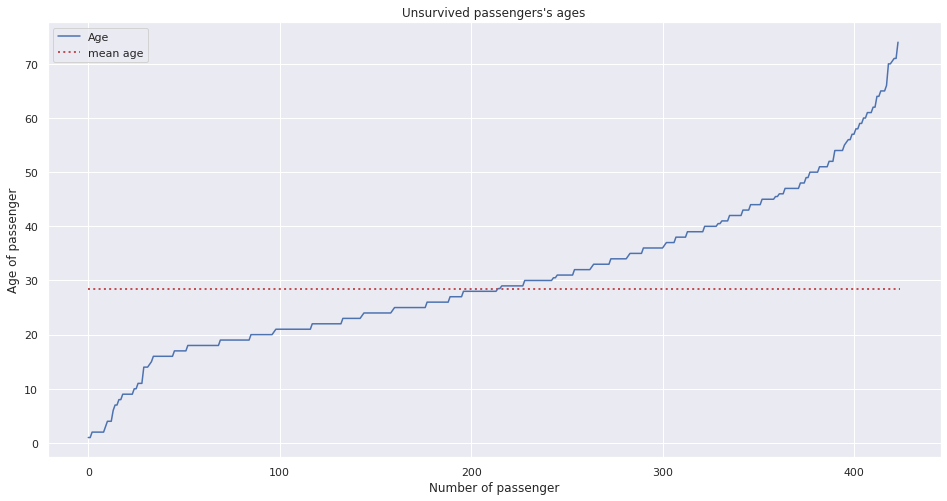

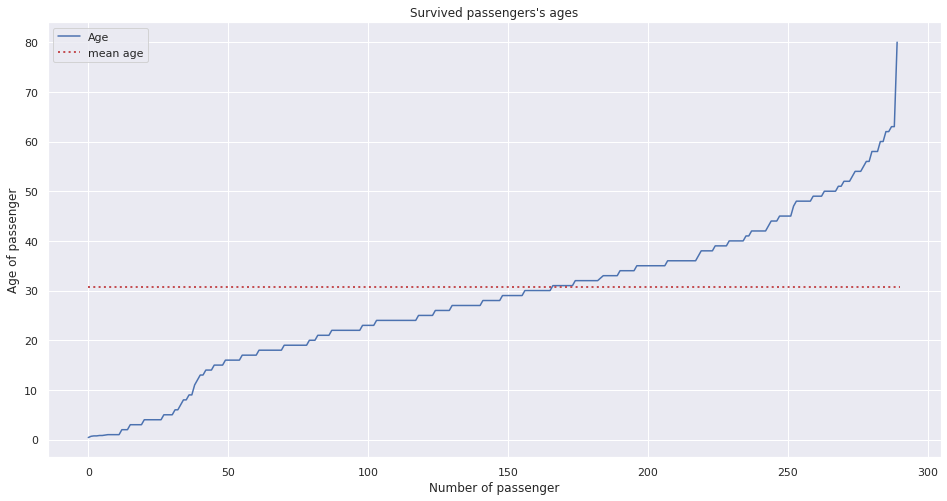

In [368]:
survived_age_means = dataset.groupby(["Survived"])

surv_age = survived_age_means.get_group(0).mean()["Age"]
unsurv_age = survived_age_means.get_group(1).mean()["Age"]
print("Mean age of unsurvived passengers: ", surv_age)
print("Mean age of survived passengers: ", unsurv_age)

asrty = survived_age_means.get_group(0).sort_values('Age')["Age"].dropna()
count_of_ages = asrty.count()
plt.plot(range(asrty.count()), asrty, label="Age")
plt.plot([0, asrty.count()], [unsurv_age, unsurv_age], '-r', linewidth=2, linestyle=':', label='mean age')

plt.xlabel("Number of passenger")
plt.ylabel("Age of passenger")
plt.title("Unsurvived passengers's ages")
plt.legend()
plt.show()



asrty = survived_age_means.get_group(1).sort_values('Age')["Age"].dropna()
count_of_ages = asrty.count()
plt.plot(range(asrty.count()), asrty, label="Age")
plt.plot([0, asrty.count()], [surv_age, surv_age], '-r', linewidth=2, linestyle=':', label='mean age')

plt.xlabel("Number of passenger")
plt.ylabel("Age of passenger")
plt.title("Survived passengers's ages")
plt.legend()
plt.show()


Таким образом, средний возраст погибших:  30.626 лет, а средний возраст выживших: 28.344 года. Люди старшего возраста могли оказаться неповоротливее молодёжи, отчего число спасшихся молодых персон может быть чуточку больше. В целом, погибло людей больше, чем спаслось, среди спасшихся есть и маленькие дети, это видно по замедленному росту графика спасшихся, скорее всего, малюток передавали тем, кто смог выбраться. Старики также есть среди спасшихся. Как мы установили выше, чем престижнее класс, тем больше в нём выживших, чаще состояние скапливают очень взрослые люди, возможно, поэтому эти старики успели эвакуироваться, впрочем повторю, молодого(среднего) поколения здесь больше.